--------------------------------------------------------------------------------------------------------------

# <p style = "text-align:center; "><font color= blue >Water Quality Prediction</font></p>

--------------------------------------------------------------------------------------------------------------

We all know water is one of the most essential resource for our living. But as the development is increasing, we are exploiting water by wasting it and treating it with harmful materials which makes water impure and unfit for use. This is the reason it is very important to know the quality of water. This kernel is based on water quality prediction. In this kernel, water quality index (WQI) and quality status of water is predicted through some parameters that affects water quality.
In this notebook I have performed Data Cleaning steps and did Exploratory Data Analysis. Then I have did some calculations as the data does not contain the column which can be used for prediction i.e <b>WQI</b>


-----

## About Dataset

### Content

The water_potability.csv file contains water quality metrics for 3276 different water bodies.

'final.csv' file contains water quality metrics of 3276 records.

###### 1. pH 
level is a measure of the acid content of the water. Most
forms of aquatic life tend to be very sensitive to pH. 

###### 2. TDS (Total Dissolved Solids)
This is a measure of the solid materials dissolved in the river
water. This includes salts, some organic materials, and a wide
range of other things from nutrients to toxic materials. 

###### 3. Turbidity:
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. T

###### 4. Temperature
The water temperature of a river is very important, as many of
the physical, biological, and chemical characteristics of a river
are directly affected by temperature. Most waterborne animal and
plant life survives within a certain range of water temperatures,
and few of them can tolerate extreme changes in this parameter. 

# **Table of Contents**
* [Importing Libraries](#2)
* [Data gathering](#3)
* [Data Cleaning](#4)
* [EDA](#5)
* [Feature Engineering](#6)
* [Model Creation](#7)

----

<a id=2></a>
# **Importing libraries**

-----

In [1]:
import os
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")

/home/karuna/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


----
<a id=3></a>
## Data Gathering

----

In [2]:
dataset = pd.read_csv('/home/karuna/Projects/Water-Quality-Prediction/Data/final.csv')
dataset.head()

,ph,TDS,Turbidity,Temperature
0,NaN,20791.31898,2.963135,29.3
1,3.716080,18630.05786,4.500656,24.0
2,8.099124,19909.54173,3.055934,24.0
3,8.316766,22018.41744,4.628771,25.5
4,9.092223,17978.98634,4.075075,26.0


In [3]:
dataset.shape

(3276, 4)

In [4]:
dataset.isnull().sum()

ph             491
TDS              0
Turbidity        0
Temperature    111
dtype: int64

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ph           2785 non-null   float64
 1   TDS          3276 non-null   float64
 2   Turbidity    3276 non-null   float64
 3   Temperature  3165 non-null   float64
dtypes: float64(4)
memory usage: 102.5 KB


In [6]:
dataset.describe()

,ph,TDS,Turbidity,Temperature
count,2785.000000,3276.000000,3276.000000,3165.000000
mean,7.080795,22014.092526,3.966786,25.231523
std,1.594320,8768.570828,0.780382,2.601129
min,0.000000,320.942611,1.450000,15.000000
25%,6.093092,15666.690300,3.439711,24.000000
50%,7.036752,20927.833605,3.955028,25.500000
75%,8.062066,27332.762125,4.500320,27.000000
max,14.000000,61227.196010,6.739000,36.000000


----

<a id=4></a>
# **Data Cleaning**

----

-----

### Below code is to fill null and empty values in csv file by mean value of all parameters respectively..

----

In [7]:
dataset.fillna(dataset.mean(), inplace=True)
dataset.isnull().sum()

ph             0
TDS            0
Turbidity      0
Temperature    0
dtype: int64

In [8]:
dataset

,ph,TDS,Turbidity,Temperature
0,7.080795,20791.31898,2.963135,29.3
1,3.716080,18630.05786,4.500656,24.0
2,8.099124,19909.54173,3.055934,24.0
3,8.316766,22018.41744,4.628771,25.5
4,9.092223,17978.98634,4.075075,26.0
...,...,...,...,...
3271,4.668102,47580.99160,4.435821,28.0
3272,7.808856,17329.80216,2.798243,23.0
3273,9.419510,33155.57822,3.298875,28.0
3274,5.126763,11983.86938,4.708658,31.0


In [9]:
dataset.dtypes

ph             float64
TDS            float64
Turbidity      float64
Temperature    float64
dtype: object

----

<a id=5></a>
# **EDA**

----

### Below is Correlation heatmap ranging from -1 to +1. Values closer to zero means there is no linear trend between the two variables. The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is.



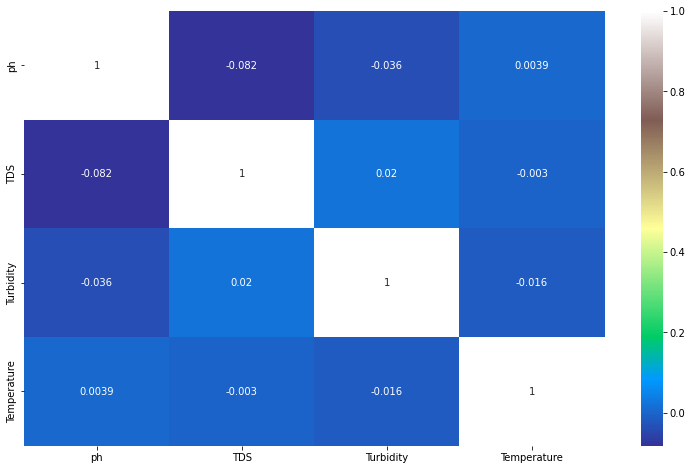

In [10]:
plt.figure(figsize=(13,8))
sns.heatmap(dataset.corr(),annot=True,cmap='terrain')
plt.show()

----
### Let's visualize our data.
----


### Visualizing pH


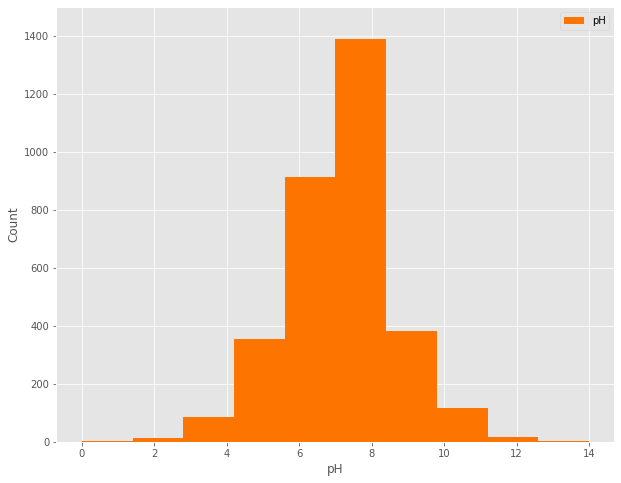

In [11]:
mpl.style.use("ggplot")
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111)
ax.set_xlabel("pH")
ax.set_ylabel("Count")
ax.set_ylim((0, 1500))
ax.hist(dataset.ph, label = "pH", bins = 10, color="#fe7401")
ax.legend()
plt.show()


### Visualizing TDS (Total Dissolved Solids)


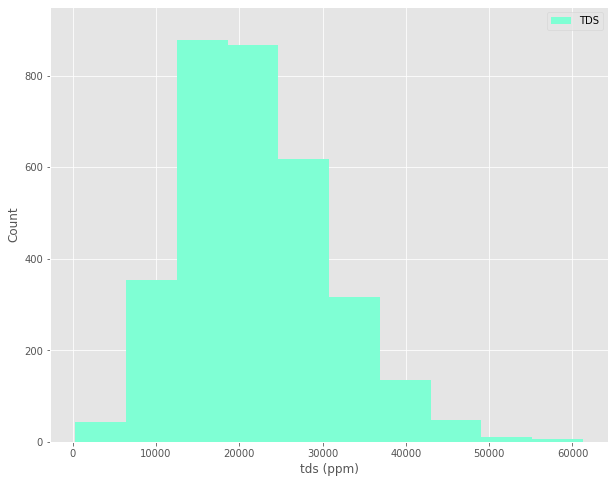

In [12]:
mpl.style.use("ggplot")
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111)
ax.set_xlabel("tds (ppm)")
ax.set_ylabel("Count")
ax.set_ylim((0, 950))
ax.hist(dataset.TDS, label = "TDS", bins = 10, color="#7FFFD4")
ax.legend()
plt.show()


### Visualizing Turbidity


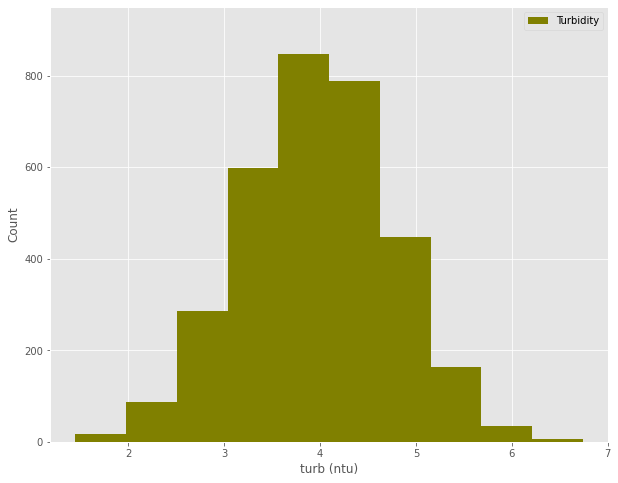

In [13]:
mpl.style.use("ggplot")
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111)
ax.set_xlabel("turb (ntu)")
ax.set_ylabel("Count")
ax.set_ylim((0, 950))
ax.hist(dataset.Turbidity, label = "Turbidity", bins = 10, color="#808000")
ax.legend()
plt.show()


### Visualizing Temperature


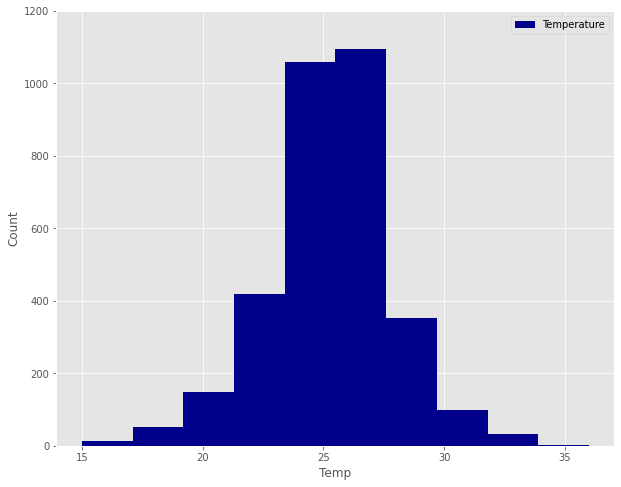

In [14]:
mpl.style.use("ggplot")
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111)
ax.set_xlabel("Temp")
ax.set_ylabel("Count")
ax.set_ylim((0, 1200))
ax.hist(dataset.Temperature, label = "Temperature", bins = 10, color="#00008B")
ax.legend()
plt.show()

----

<a id=6></a>
# **Feature Engineering**

### > Box-Plot
* box or whiskers plot is a method used for depicting groups of numerical data through their quartiles graphically. These may also have some lines extending from the boxes or whiskers which indicates the variability outside the lower and upper quartiles, hence the terms box-and-whisker plot and box-and-whisker diagram. Outliers can be indicated as individual points.

* It helps to find out how much the data values vary or spread out with the help of graphs. As we need more information than just knowing the measures of central tendency, this is where the box plot helps. 

* The five-number summary in the box plot is minimum, maximum, median, first quartile, and third quartile.

![alt text](https://cdn1.byjus.com/wp-content/uploads/2020/10/Box-Plot-and-Whisker-Plot-1.png)

> An <mark>outlier</mark> is a value that lies in both extremes of data.
>> Some outliers represent natural variations in the population, and they should be left as is in your dataset. These are called true outliers.
----

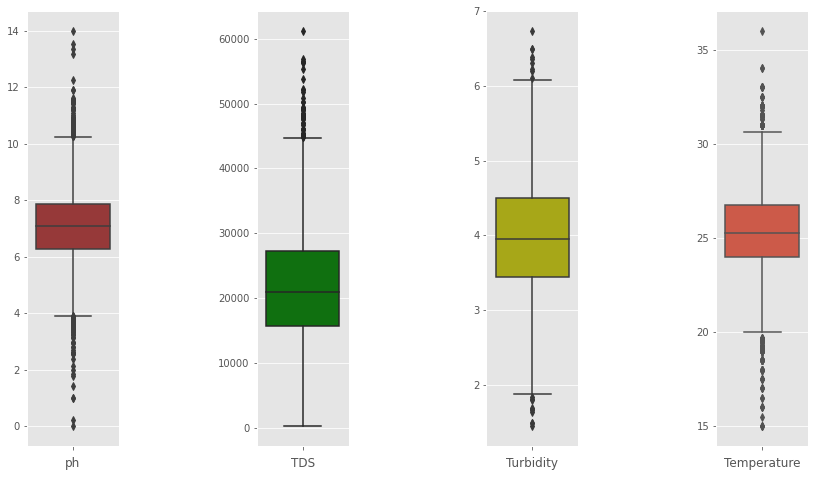

In [15]:
# initialize figure with 4 subplots in a row
fig, ax = plt.subplots(1, 4, figsize=(14, 8))

# add padding between the subplots
plt.subplots_adjust(wspace=1.5) 

# draw boxplot for age in the 1st subplot
sns.boxplot(data=dataset['ph'], ax=ax[0], color='brown',)
ax[0].set_xlabel('ph')

# draw boxplot for station_distance in the 2nd subplot
sns.boxplot(data=dataset['TDS'], ax=ax[1], color='g')
ax[1].set_xlabel('TDS')

# draw boxplot for stores_count in the 3rd subplot
sns.boxplot(data=dataset['Turbidity'], ax=ax[2], color='y')
ax[2].set_xlabel('Turbidity')

# finally draw boxplot for unit_price in the 4th subplot
sns.boxplot(data=dataset['Temperature'], ax=ax[3])
ax[3].set_xlabel('Temperature')

# by default, you'll see x-tick label set to 0 in each subplot
# remove it by setting it to empty list
for subplot in ax:
    subplot.set_xticklabels([])
    
plt.show()

In [16]:
# To filter outliers:

# Q1 = dataset['Temperature'].quantile(0.25)
# Q3 = dataset['Temperature'].quantile(0.75)
# IQR = Q3 - Q1    #IQR is interquartile range.
# print(Q1, " ", Q3, " ", IQR)


# filter = (dataset['Temperature'] >= Q1 - 1.5 * IQR) & (dataset['Temperature'] <= Q3 + 1.5 *IQR)
# dataset = dataset.loc[filter] 

### The Water Quality Index is calculated by aggregating the quality rating with the weight linearly, 
#### WQI = ∑ (qn x Wn)
#### where qn =Quality rating for the nth Water quality parameter, Wn= unit weight for the nth parameters.       

<br>The equation can be given as:
<br>$$WQI_{MP} = \sum_{i=1} W_Y Q_Y$$
<br>Here,
>>$$Y = available parameters$$
>>$$Q_Y = q- values of available parameters$$
>>$$W_Y = weighting factors of available parameters$$



<table style = "border: 1px solid black;
  border-collapse: collapse;background-color: #D6EEEE;width:50%">
  <tr>
    <th>WQI value</th>
    <th>Water quality</th>
  </tr>
  <tr>
    <td> less than 50 </td>
    <td> excellent </td>  
  </tr>
  <tr>
    <td> 50-100</td>
    <td> good water </td> 
  </tr>
    <tr>
    <td> 100-200 </td>
    <td> poor water </td> 
  </tr>
    <tr>
    <td> 200-300</td>
    <td>  very poor water </td> 
  </tr>
    <tr>
    <td> >300 </td>
    <td> Water unsuitable
for drinking </td> 
  </tr>
</table>
<p style = "text-align: center;">  Water quality classification based on WQI value </p>


<table style = "border: 1px solid black;
  border-collapse: collapse;background-color: #D6EEEE;width:50%">
  <tr>
    <th>Water quality</th>
    <th>BIS(Bureau of Indian Standard) for Water, $$S_n$$</th> 
  </tr>
  <tr>
    <td> pH </td>
    <td> 8.5 </td>  
  </tr>
  <tr>
    <td> TDS </td>
    <td> 500 </td> 
  </tr>
    <tr>
    <td> Turbidity </td>
    <td> 5 </td> 
  </tr>
    <tr>
    <td> Temperature </td>
    <td> 35 </td> 
  </tr>
    
</table>
<p style = "text-align: center;">  Water Quality Standards </p>

#### PARTS OF WATER QUALITY INDEX
There are two parts of water quality index.
 1. Q- value
 2. Weighting factor

> Q- value
>> It is the indication of water quality relative to 100 of one parameter. The Q-Value is an indication of how good (or bad) the water quality is relative to one parameter.<br>
    
> Weighting Factor
>> It sets the relative importance of the parameter to over all
water quality.
 
#### REFERENCES:
[1]. National sanitation foundation <br>
[2]. www.water-WATER <br>
[3]. "QUALITY INDEX WITH MISSING PARAMETERS",Garima Srivastava, Dr. Pradeep Kumar, M.Tech(Environmental Science & Engg.), Associate Professor, Civil Engg. Department, HBTI Kanpur, India.net <br>
[4]. www.waterontheweb.org <br>
[5] https://www.researchgate.net/publication/337881191_Various_methods_for_calculating_the_water_quality_index



#### Applying <mark> Weighted Arithmetic Index </mark> method for calculating wqi

In [17]:
#Summation of 1/Sn where Sn is BIS std.

std_ph = 8.5
std_tds = 500
std_turb = 5
std_temp = 35;

sum_Sn = (1/std_ph) + (1/std_tds) + (1/std_turb) + (1/std_temp)
print("\nsum_Sn = ", sum_Sn)

#Calculating k value

k = 1/sum_Sn
print("K = ", k, "\n")

#Calculating Weight for parameters, Wi = k/Sn

wt_ph = k/std_ph; 
print("Weight factor for pH = ", wt_ph)
wt_tds = k/std_tds;
print("Weight factor for tds = ", wt_tds)
wt_turb = k/std_turb;
print("Weight factor for turbidity = ", wt_turb)
wt_temp = k/std_temp;
print("Weight factor for temperature =  ", wt_temp)

#Summation of all weight factor will give us value one

print('''
Summarizing Ideal values for all parameters, Vo:
pH: 6.5
TDS: 0
Turbidity: 0
Temperature: 20
''')


sum_Sn =  0.348218487394958
K =  2.8717602200878423 

Weight factor for pH =  0.33785414353974613
Weight factor for tds =  0.005743520440175684
Weight factor for turbidity =  0.5743520440175685
Weight factor for temperature =   0.08205029200250978

Summarizing Ideal values for all parameters, Vo:
pH: 6.5
TDS: 0
Turbidity: 0
Temperature: 20



In [18]:
'''
Calcuating Vn/Sn, 
where Vn is measured values for respective parameter
Representing Vn/Sn by ratio
Since Ideal value for pH and Temp isn't equal to zero, we use different formula.
'''

idl_ph, idl_temp = 6.5, 20

dataset['pH_ratio'] = abs((dataset.ph - idl_ph)/(std_ph - idl_ph))
# dataset['pH_ratio'] = dataset['ph'].map(lambda t: ((t-7)/(8.5-7)) if ((t-7)/(8.5-7) > 0) else 0)

    
dataset['tds_ratio'] = dataset.TDS/std_tds
dataset['turb_ratio'] = dataset.Turbidity/std_turb

dataset['temp_ratio'] = abs((dataset.Temperature - idl_temp)/(std_temp - idl_temp))
# dataset['temp_ratio'] = dataset['temp'].map(lambda t: ((t-20)/(35-20)) if ((t-20)/(35-25) > 0) else 0)

In [19]:
dataset

,ph,TDS,Turbidity,Temperature,pH_ratio,tds_ratio,turb_ratio,temp_ratio
0,7.080795,20791.31898,2.963135,29.3,0.290397,41.582638,0.592627,0.620000
1,3.716080,18630.05786,4.500656,24.0,1.391960,37.260116,0.900131,0.266667
2,8.099124,19909.54173,3.055934,24.0,0.799562,39.819083,0.611187,0.266667
3,8.316766,22018.41744,4.628771,25.5,0.908383,44.036835,0.925754,0.366667
4,9.092223,17978.98634,4.075075,26.0,1.296112,35.957973,0.815015,0.400000
...,...,...,...,...,...,...,...,...
3271,4.668102,47580.99160,4.435821,28.0,0.915949,95.161983,0.887164,0.533333
3272,7.808856,17329.80216,2.798243,23.0,0.654428,34.659604,0.559649,0.200000
3273,9.419510,33155.57822,3.298875,28.0,1.459755,66.311156,0.659775,0.533333
3274,5.126763,11983.86938,4.708658,31.0,0.686619,23.967739,0.941732,0.733333


In [20]:
dataset.shape

(3276, 8)

In [21]:
dataset['Qn_ph'] = dataset.pH_ratio * 100
dataset['Qn_tds'] = dataset.tds_ratio * 100
dataset['Qn_turb'] = dataset.turb_ratio * 100
dataset['Qn_temp'] = dataset.temp_ratio * 100

dataset.head()
dataset.dtypes


ph             float64
TDS            float64
Turbidity      float64
Temperature    float64
pH_ratio       float64
tds_ratio      float64
turb_ratio     float64
temp_ratio     float64
Qn_ph          float64
Qn_tds         float64
Qn_turb        float64
Qn_temp        float64
dtype: object

In [22]:
dataset['wph']=dataset.Qn_ph * wt_ph
dataset['wtds']=dataset.Qn_tds * wt_tds
dataset['wturb']=dataset.Qn_turb * wt_turb
dataset['wtemp']=dataset.Qn_temp * wt_temp

dataset['wqi']=(dataset.wph+dataset.wtds+dataset.wturb+dataset.wtemp)/(wt_ph + wt_tds + wt_turb + wt_temp)
dataset

# dataset.drop(['pH_ratio', 'tds_ratio', 'turb_ratio', 'temp_ratio'], axis=1)

,ph,TDS,Turbidity,Temperature,pH_ratio,tds_ratio,turb_ratio,temp_ratio,Qn_ph,Qn_tds,Qn_turb,Qn_temp,wph,wtds,wturb,wtemp,wqi
0,7.080795,20791.31898,2.963135,29.3,0.290397,41.582638,0.592627,0.620000,29.039725,4158.263796,59.262708,62.000000,9.811191,23.883073,34.037657,5.087118,72.819040
1,3.716080,18630.05786,4.500656,24.0,1.391960,37.260116,0.900131,0.266667,139.195996,3726.011572,90.013126,26.666667,47.027944,21.400424,51.699223,2.188008,122.315598
2,8.099124,19909.54173,3.055934,24.0,0.799562,39.819083,0.611187,0.266667,79.956209,3981.908346,61.118675,26.666667,27.013537,22.870172,35.103636,2.188008,87.175352
3,8.316766,22018.41744,4.628771,25.5,0.908383,44.036835,0.925754,0.366667,90.838294,4403.683488,92.575411,36.666667,30.690094,25.292646,53.170876,3.008511,112.162127
4,9.092223,17978.98634,4.075075,26.0,1.296112,35.957973,0.815015,0.400000,129.611173,3595.797268,81.501508,40.000000,43.789672,20.652535,46.810558,3.282012,114.534777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,47580.99160,4.435821,28.0,0.915949,95.161983,0.887164,0.533333,91.594916,9516.198320,88.716418,53.333333,30.945722,54.656480,50.954456,4.376016,140.932673
3272,7.808856,17329.80216,2.798243,23.0,0.654428,34.659604,0.559649,0.200000,65.442801,3465.960432,55.964857,20.000000,22.110121,19.906815,32.143530,1.641006,75.801472
3273,9.419510,33155.57822,3.298875,28.0,1.459755,66.311156,0.659775,0.533333,145.975516,6631.115644,65.977510,53.333333,49.318433,38.085948,37.894318,4.376016,129.674714
3274,5.126763,11983.86938,4.708658,31.0,0.686619,23.967739,0.941732,0.733333,68.661854,2396.773876,94.173169,73.333333,23.197692,13.765920,54.088552,6.017021,97.069185


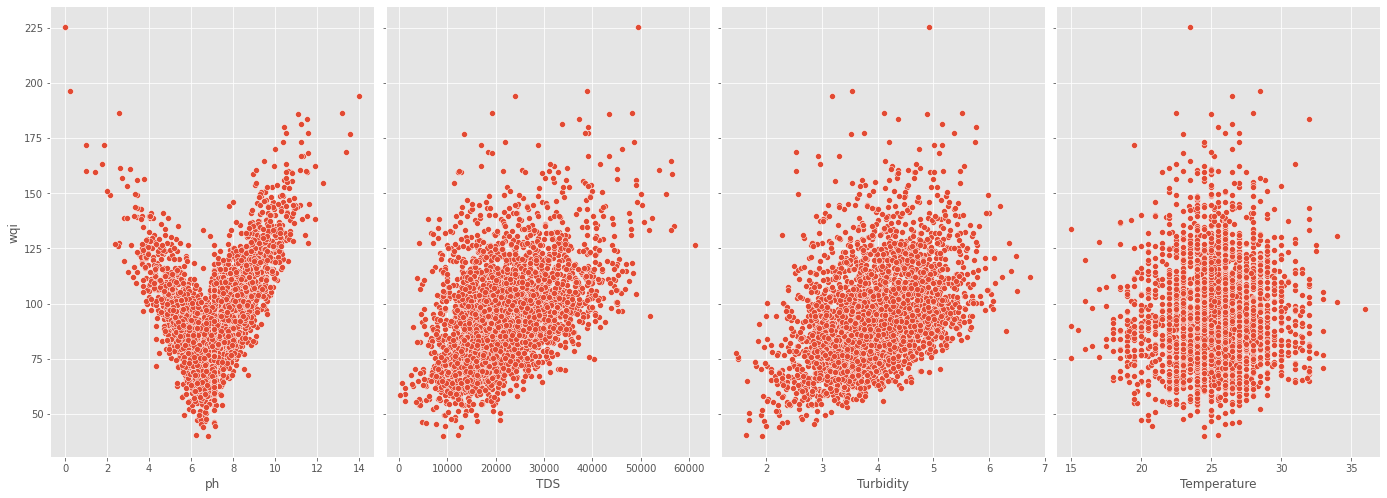

In [23]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(dataset, x_vars=['ph','TDS','Turbidity', 'Temperature'], y_vars='wqi', size=7, aspect=0.7)

In [24]:
max(dataset['wqi'])

225.14587360030248

In [25]:
min(dataset['wqi'])

39.88124361088856


#### Then we classify the water on the basis of their water quality index.


In [26]:
dataset['quality']=dataset.wqi.apply(lambda x:('Excellent' if (25>=x>=0)  
                                 else('Good' if  (50>=x>=25) 
                                      else('Poor' if (75>=x>=50)
                                          else('Very Poor' if (100>=x>=75) 
                                              else 'Unsuitable')))))
dataset

,ph,TDS,Turbidity,Temperature,pH_ratio,tds_ratio,turb_ratio,temp_ratio,Qn_ph,Qn_tds,Qn_turb,Qn_temp,wph,wtds,wturb,wtemp,wqi,quality
0,7.080795,20791.31898,2.963135,29.3,0.290397,41.582638,0.592627,0.620000,29.039725,4158.263796,59.262708,62.000000,9.811191,23.883073,34.037657,5.087118,72.819040,Poor
1,3.716080,18630.05786,4.500656,24.0,1.391960,37.260116,0.900131,0.266667,139.195996,3726.011572,90.013126,26.666667,47.027944,21.400424,51.699223,2.188008,122.315598,Unsuitable
2,8.099124,19909.54173,3.055934,24.0,0.799562,39.819083,0.611187,0.266667,79.956209,3981.908346,61.118675,26.666667,27.013537,22.870172,35.103636,2.188008,87.175352,Very Poor
3,8.316766,22018.41744,4.628771,25.5,0.908383,44.036835,0.925754,0.366667,90.838294,4403.683488,92.575411,36.666667,30.690094,25.292646,53.170876,3.008511,112.162127,Unsuitable
4,9.092223,17978.98634,4.075075,26.0,1.296112,35.957973,0.815015,0.400000,129.611173,3595.797268,81.501508,40.000000,43.789672,20.652535,46.810558,3.282012,114.534777,Unsuitable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,47580.99160,4.435821,28.0,0.915949,95.161983,0.887164,0.533333,91.594916,9516.198320,88.716418,53.333333,30.945722,54.656480,50.954456,4.376016,140.932673,Unsuitable
3272,7.808856,17329.80216,2.798243,23.0,0.654428,34.659604,0.559649,0.200000,65.442801,3465.960432,55.964857,20.000000,22.110121,19.906815,32.143530,1.641006,75.801472,Very Poor
3273,9.419510,33155.57822,3.298875,28.0,1.459755,66.311156,0.659775,0.533333,145.975516,6631.115644,65.977510,53.333333,49.318433,38.085948,37.894318,4.376016,129.674714,Unsuitable
3274,5.126763,11983.86938,4.708658,31.0,0.686619,23.967739,0.941732,0.733333,68.661854,2396.773876,94.173169,73.333333,23.197692,13.765920,54.088552,6.017021,97.069185,Very Poor


In [27]:
dataset.describe()

,ph,TDS,Turbidity,Temperature,pH_ratio,tds_ratio,turb_ratio,temp_ratio,Qn_ph,Qn_tds,Qn_turb,Qn_temp,wph,wtds,wturb,wtemp,wqi
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,22014.092526,3.966786,25.231523,0.605018,44.028185,0.793357,0.354474,60.501750,4402.818505,79.335723,35.447434,20.440767,25.287678,45.566635,2.908472,94.203552
std,1.469956,8768.570828,0.780382,2.556669,0.508322,17.537142,0.156076,0.158232,50.832175,1753.714166,15.607648,15.823186,17.173861,10.072493,8.964285,1.298297,21.806012
min,0.000000,320.942611,1.450000,15.000000,0.000466,0.641885,0.290000,0.000000,0.046600,64.188522,29.000000,0.000000,0.015744,0.368668,16.656209,0.000000,39.881244
25%,6.277673,15666.690300,3.439711,24.000000,0.290397,31.333381,0.687942,0.266667,29.039725,3133.338060,68.794217,26.666667,9.811191,17.996391,39.512099,2.188008,79.273505
50%,7.080795,20927.833605,3.955028,25.231523,0.434031,41.855667,0.791006,0.348768,43.403115,4185.566721,79.100551,34.876819,14.663922,24.039888,45.431563,2.861653,91.482951
75%,7.870050,27332.762125,4.500320,26.750000,0.843858,54.665524,0.900064,0.450000,84.385832,5466.552425,90.006396,45.000000,28.510103,31.397256,51.695357,3.692263,106.133345
max,14.000000,61227.196010,6.739000,36.000000,3.750000,122.454392,1.347800,1.066667,375.000000,12245.439202,134.780000,106.666667,126.695304,70.331930,77.411168,8.752031,225.145874


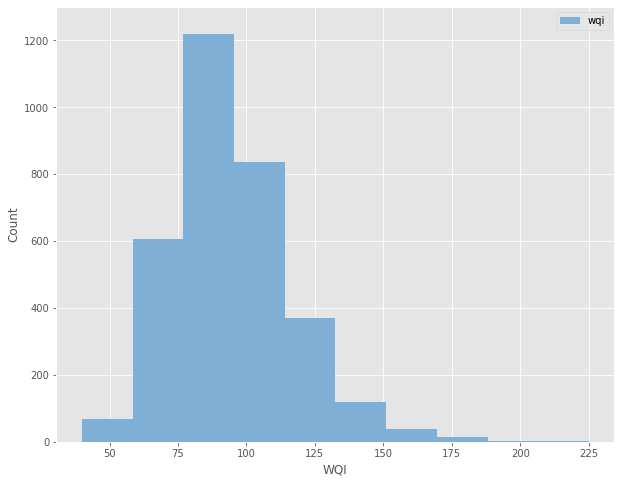

In [28]:
mpl.style.use("ggplot")
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111)
ax.set_xlabel("WQI")
ax.set_ylabel("Count")
ax.set_ylim((0, 1300))
ax.hist(dataset.wqi, label = "wqi", bins = 10, color="#7FAFD4")
ax.legend()
plt.show()

<AxesSubplot:>

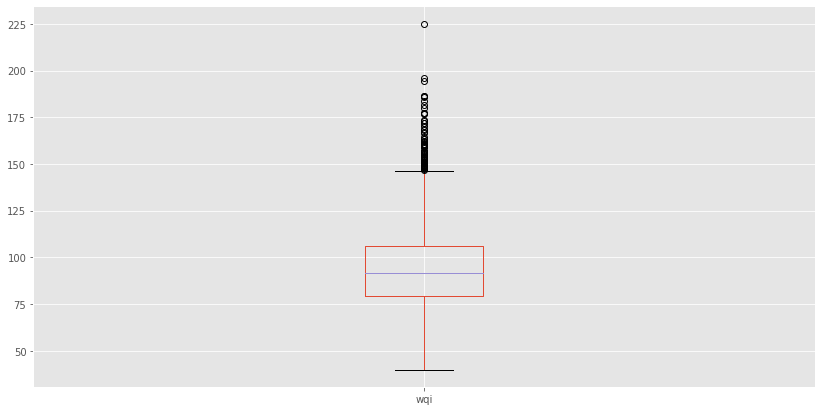

In [29]:
dataset.boxplot(column = ['wqi'], figsize=(14,7))

----

<a id=7></a>
# **Model Creation**

----


## <mark><em>1. Multiple Linear Regression</em></mark>


* Is an extension of Simple Linear regression as it takes more than one predictor variable to predict the response variable. It is an important regression algorithm that models the linear relationship between a single dependent continuous variable and more than one independent variable. It uses two or more independent variables to predict a dependent variable by fitting a best linear relationship.

* Multiple linear regression is used to estimate the relationship between two or more independent variables and one dependent variable. You can use multiple linear regression when you want to know:

* How strong the relationship is between two or more independent variables and one dependent variable (e.g. how rainfall, temperature, and amount of fertilizer added affect crop growth).
* The value of the dependent variable at a certain value of the independent variables (e.g. the expected yield of a crop at certain levels of rainfall, temperature, and fertilizer addition).


In [30]:
#Setting the value for X and Y
x = dataset[['ph', 'TDS', 'Turbidity', 'Temperature']]
y = dataset['wqi']


In [31]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 100, shuffle='true')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 28, shuffle='true')
# summarize the shape of the train and test sets
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
    

(2293, 4) (983, 4) (2293,) (983,)


In [32]:

#Fitting the Multiple Linear Regression model
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()  
mlr.fit(x_train, y_train)


LinearRegression()

In [33]:
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intercept:  -25.110533330580097
Coefficients:


[('ph', 4.835232532166186),
 ('TDS', 0.0012203934351789937),
 ('Turbidity', 11.524707764923681),
 ('Temperature', 0.5049309530555888)]

In [34]:
#Prediction of test set
y_pred_mlr= mlr.predict(x_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))


Prediction for test set: [ 82.43526069  96.94221175  73.95649509 109.71555046 122.4148029
  81.65667975  87.09662882  93.71757487  70.84132529  98.73785264
 102.79005544  96.51046426 104.42208463 117.50328508 116.31025307
  71.72748091 101.49083145  73.54548322  96.19396368  87.70072197
 106.02392466 100.47322111  95.94673184 118.79513514  85.19689664
 105.86435718  86.63875957  92.2444625   72.49052425  91.92865543
  79.48514798 103.68628018  83.28292035 104.19216637 106.29446513
  70.99549255  76.94651732  95.06857655  87.94375718  59.52389649
  94.33041785 120.79094257  81.89311745 123.189182    97.3785797
  65.9045149   82.4330945   69.42553887  75.8264534   73.51360387
  89.15638319  86.84789605  78.46426088  97.77996028  88.89365598
 105.77745639 101.06313215  98.82768547  85.42661674 117.46061651
  56.18950159  94.75712338  77.55873191 124.33847888 109.82594868
  85.79463871  98.94548558  93.66167663  82.58721198 101.96751653
  58.17187549 107.30273823  85.48739182  91.55762573 

In [35]:
'''
Once we have fitted (trained) the model, 
we can make predictions using the predict() function. 
We pass the values of x_test to this method and compare the predicted values called y_pred_mlr with y_test values to check how accurate our predicted values are.
'''
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head(10)


,Actual value,Predicted value
491,64.511040,82.435261
91,85.502297,96.942212
947,60.027739,73.956495
1377,109.736925,109.715550
1143,111.325881,122.414803
1283,72.943179,81.656680
2808,76.122920,87.096629
2028,90.925553,93.717575
2796,83.057967,70.841325
2320,89.766697,98.737853


In [36]:
res = mlr.predict([[7.716080, 18630.05786, 4.500656, 24.0]])[0]
res

98.92159603935006

### R-Squared (R² or the coefficient of determination) 
* Is a statistical measure in a regression model that determines the proportion of variance in the dependent variable that can be explained by the independent variable. In other words, r-squared shows how well the data fit the regression model (the goodness of fit).

### Absolute Error
* Absolute Error is the amount of error in your measurements. It is the difference between the measured value and “true” value. For example, if a scale states 90 pounds but you know your true weight is 89 pounds, then the scale has an absolute error of 90 lbs – 89 lbs = 1 lbs.

### Mean Absolute Error
* The Mean Absolute Error(MAE) is the average of all absolute errors. 

### Mean Squared Error
* mean squared error or mean squared deviation (MSD) of an estimator (of a procedure for estimating an unobserved quantity) measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value. 

### Root Mean Square Error
* Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit. Root mean square error is commonly used in climatology, forecasting, and regression analysis to verify experimental results.


In [37]:
#Model Evaluation

from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 48.82
Mean Absolute Error: 11.860612837168542
Mean Square Error: 242.78428861858578
Root Mean Square Error: 15.581536786164122


In [38]:
from sklearn.metrics import mean_squared_error, r2_score

mlr_pred_train = mlr.predict(x_train)
mlr_pred_test = mlr.predict(x_test)

print("Training RMSE: ", np.sqrt(mean_squared_error(y_train, mlr_pred_train)))
print("Training R2: ", r2_score(y_train, mlr_pred_train)*100)


print("Testing RMSE: ", np.sqrt(mean_squared_error(y_test, mlr_pred_test)))
print("Testing R2: ", r2_score(y_test, mlr_pred_test)*100)


Training RMSE:  15.605068239562812
Training R2:  48.99789468824019
Testing RMSE:  15.581536786164122
Testing R2:  48.25738871834145


### >> K Fold Cross Validation

In [39]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

model = LinearRegression()
kfold_validation = KFold(10)
results = cross_val_score(model, x, y, cv = kfold_validation)
import numpy as np
from sklearn.model_selection import cross_val_score
results = cross_val_score(model, x, y, cv = kfold_validation)
print(results)
print("\nMean Accuracy Score: ", np.mean(results)*100)

[0.43238233 0.47282043 0.3299838  0.54697617 0.57332949 0.65028154
 0.53672103 0.44739821 0.32642886 0.48374862]

Mean Accuracy Score:  48.00070490781051


### As seen above, Multiple Linear Regression gives accuracy of 48%



## <mark><em>2. Logistic Regression Model</em></mark>
#### Here we are creating a logistic regression model because we don't have to predict a continuous value. 


In [40]:
#Importing packages

import pandas as pd # data processing
import numpy as np # working with arrays
import itertools # construct specialized tools
import matplotlib.pyplot as plt # visualizations
from matplotlib import rcParams # plot size customization
from termcolor import colored as cl # text customization
from sklearn.model_selection import train_test_split # splitting the data
from sklearn.linear_model import LogisticRegression # model algorithm
from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.metrics import jaccard_score as jss # evaluation metric
from sklearn.metrics import precision_score # evaluation metric
from sklearn.metrics import classification_report # evaluation metric
from sklearn.metrics import confusion_matrix # evaluation metric
from sklearn.metrics import log_loss # evaluation metric


from sklearn import metrics 
from sklearn.linear_model import LogisticRegression

In [41]:
#Setting the value for X and Y
x = dataset[['ph', 'TDS', 'Turbidity', 'Temperature']]
y = dataset.quality

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42, shuffle='true')

In [43]:
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train, y_train)

#Train model
y_pred = logistic_regression.predict(x_test)

In [44]:
# predicting wqi
firstSample = logistic_regression.predict((np.array([7.716080, 18630.05786, 4.500656, 24.0]).reshape(1, -1)))
firstSample

array(['Very Poor'], dtype=object)

In [45]:
#Finding Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy_percentage = 100 * accuracy
print("Accuracy Score: ", accuracy_percentage)

Accuracy Score:  57.88402848423194


### >> Stratified K-fold Cross Validation
* Used for unbalanced data and only used for discrete data

In [46]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

#Setting the value for X and Y
x = dataset[['ph', 'TDS', 'Turbidity', 'Temperature']]
y = dataset.quality

skfold = StratifiedKFold(n_splits = 10)
model = LogisticRegression()
score = cross_val_score(model, x, y, cv = skfold)
print(score)
print("\nMean Accuracy score: ", np.mean(score)*100)

[0.5        0.52743902 0.53963415 0.5945122  0.52439024 0.59146341
 0.5351682  0.58409786 0.57186544 0.58103976]

Mean Accuracy score:  55.496102782128744


### As seen above, Logistic Regression for classification gives accuracy of 55%




## <mark><em>3. Random Forest Regression</em></mark>

* Random Forest Regression algorithms are a class of Machine Learning algorithms that use the combination of multiple random decision trees each trained on a subset of data. 
* The use of multiple trees gives stability to the algorithm and reduces variance. The random forest regression algorithm is a commonly used model due to its ability to work well for large and most kinds of data.
* A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 

![alt text](https://miro.medium.com/v2/resize:fit:720/format:webp/0*4hfu8vepPsbjTBuH.png)

In [47]:
import requests, io # for HTTP requests and I/O commands
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor # for building the model

In [48]:
#Setting the value for X and Y
x = dataset[['ph', 'TDS', 'Turbidity', 'Temperature']]
y = dataset.wqi

In [49]:
# Splitting the dataset into training and testing set (80/20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 28, shuffle='true')

In [50]:
# # Initializing the Random Forest Regression model with 10 decision trees
rf = RandomForestRegressor(n_estimators = 100, max_features = 'sqrt', random_state = 42)

#Fitting the Random Forest Regression model to the data
rf.fit(x_train, y_train)

RandomForestRegressor(max_features='sqrt', random_state=42)

In [51]:
# Predicting the target values of the test set
y_pred = rf.predict(x_test)

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("\nRMSE: ", rmse)


RMSE:  3.802


In [52]:
res = rf.predict([[7, 100, 1, 0]])[0]
print("WQI: ", res)

WQI:  46.17792317028733


In [53]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
mlr_diff.head(10)

,Actual value,Predicted value
491,64.511040,73.345299
91,85.502297,86.131665
947,60.027739,61.281541
1377,109.736925,102.046160
1143,111.325881,112.655407
1283,72.943179,72.521181
2808,76.122920,76.533629
2028,90.925553,90.400588
2796,83.057967,97.111790
2320,89.766697,88.737143


In [54]:
from sklearn.metrics import mean_squared_error, r2_score

rf_pred_train = rf.predict(x_train)
rf_pred_test = rf.predict(x_test)

print("Training RMSE: ", np.sqrt(mean_squared_error(y_train, rf_pred_train)))
print("Training R2: ", r2_score(y_train, rf_pred_train)*100)


print("Testing RMSE: ", np.sqrt(mean_squared_error(y_test, rf_pred_test)))
print("Testing R2: ", r2_score(y_test, rf_pred_test)*100)


Training RMSE:  1.6007749514883318
Training R2:  99.46331764192612
Testing RMSE:  3.801837405394453
Testing R2:  96.91954518880888


### >> K Fold Cross Validation

In [55]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

model = RandomForestRegressor()
kfold_validation = KFold(10)
results = cross_val_score(model, x, y, cv = kfold_validation)
import numpy as np
from sklearn.model_selection import cross_val_score
results = cross_val_score(model, x, y, cv = kfold_validation)
print(results)
print("\nMean Accuracy Score: ", np.mean(results)*100)

[0.98536456 0.97522661 0.9695965  0.9777798  0.977109   0.98831989
 0.98336054 0.97944179 0.97542544 0.97538919]

Mean Accuracy Score:  97.87013323296593


### As seen above, Random Forest Regressor gives accuracy of 97%


## <mark><em>4. Random Forest Classifier</em></mark>

* consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction

![alt text](https://www.freecodecamp.org/news/content/images/2020/08/how-random-forest-classifier-work.PNG)

In [56]:
#Setting the value for X and Y

x = dataset[['ph', 'TDS', 'Turbidity', 'Temperature']]
y = dataset.quality

# Splitting the dataset into training and testing set (80/20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 28, shuffle='true')

In [57]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [58]:
clf.predict([[6.5, 20000, 1, 25]])


array(['Poor'], dtype=object)

In [59]:
# Visulaizing quality for ph = 6.2, tds = 500.05786, turbidity = 2.5, temp = 24.0
clf.predict([[7, 0, 0.5, 25.0]])


array(['Good'], dtype=object)

In [60]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred) * 100)


Accuracy: 91.25127161749745


### >> Stratified K-fold Cross Validation
* Used for unbalanced data and only used for discrete data

In [61]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

skfold = StratifiedKFold(n_splits = 10)
model = RandomForestClassifier()
score = cross_val_score(model, x, y, cv = skfold)
print(score)
print("\nMean Accuracy score: ", np.mean(score)*100)

[0.89634146 0.91158537 0.89939024 0.91768293 0.95121951 0.92987805
 0.95107034 0.9204893  0.91743119 0.93272171]

Mean Accuracy score:  92.2781009920191


### As seen above, random forest classifier gives accuracy of 92%

## <mark><em>5. Support Vector Regression Or SVR</em></mark>

* SVR is a powerful algorithm that allows us to choose how tolerant we are of errors, both through an acceptable error margin(ϵ) and through tuning our tolerance of falling outside that acceptable error rate.
* The algorithm's goal is to minimize the error by identifying a function that puts more of the original points inside the tube while at the same time reducing the “slack.”
* SVM and SVR algorithms can also handle non-linear situations through a kernel trick. A kernel is a function (you can choose between a few different ones) that takes the original non-linear problem and transforms it into a linear one, which is then handled by the algorithm in a higher-dimensional space.
* Support Vector regression is a type of Support vector machine that supports linear and non-linear regression. As it seems in the below graph, the mission is to fit as many instances as possible between the lines while limiting the margin violations. The violation concept in this example represents as ε (epsilon).

![alt text](https://miro.medium.com/v2/resize:fit:640/format:webp/1*25Kk53QBOpBie4_qMSTnAA.png)

In [62]:
#Setting the value for X and Y
x = dataset[['ph', 'TDS', 'Turbidity', 'Temperature']]
y = dataset.wqi

In [63]:
# Splitting the dataset into training and testing set (80/20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 28, shuffle='true')

In [64]:
from sklearn.svm import SVR
svr_model = SVR()
svr_model.fit(x_train, y_train)

SVR()

In [65]:
y_pred = svr_model.predict(x_test)
y_pred

array([ 99.5424878 ,  99.67259562,  82.04750338,  83.8650241 ,
       105.7652484 ,  81.97765844,  90.98234849,  89.50583803,
        83.22253004,  88.905668  ,  96.8749103 ,  90.56096087,
        90.73064016, 104.79557655, 101.11459257,  79.58331442,
       102.56738821,  81.16730652,  85.95827448,  83.86320704,
        90.4316861 , 104.54367822,  99.41565297, 114.37281506,
        96.10288279,  84.67518288,  79.11632219,  81.98767588,
        88.66723605, 105.88368386,  91.69776065, 100.03206301,
        91.89171468,  91.36222781,  93.13120094,  79.36807601,
        80.15948309,  95.4518023 ,  88.09836403,  88.17979374,
       112.73204804,  90.36236096,  83.2093401 ,  89.84444158,
        85.94352683,  79.36909979,  92.97252715,  83.28603773,
        79.34856625,  80.92500935,  79.82420696,  83.11396811,
        87.06739331,  92.31875461,  83.82124697,  87.07739607,
        96.81236189, 103.4835064 ,  88.5012446 , 101.17872152,
        79.18276928,  87.35038304,  84.19967521,  91.17

In [66]:
#Actual value and the predicted value
svr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
svr_diff.head(10)

,Actual value,Predicted value
491,64.511040,99.542488
91,85.502297,99.672596
947,60.027739,82.047503
1377,109.736925,83.865024
1143,111.325881,105.765248
1283,72.943179,81.977658
2808,76.122920,90.982348
2028,90.925553,89.505838
2796,83.057967,83.222530
2320,89.766697,88.905668


In [67]:
from sklearn.metrics import mean_squared_error, r2_score

svr_pred_train = svr_model.predict(x_train)
svr_pred_test = svr_model.predict(x_test)

print("Training RMSE: ", np.sqrt(mean_squared_error(y_train, svr_pred_train)))
print("Training R2: ", r2_score(y_train, svr_pred_train)*100)


print("Testing RMSE: ", np.sqrt(mean_squared_error(y_test, svr_pred_test)))
print("Testing R2: ", r2_score(y_test, svr_pred_test)*100)


Training RMSE:  19.724485144191075
Training R2:  18.516793433560387
Testing RMSE:  19.26963441755334
Testing R2:  20.863887086569587


### >> K Fold Cross Validation


In [68]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
model = SVR()
kfold_validation = KFold(10)
results = cross_val_score(model, x, y, cv = kfold_validation)
import numpy as np
from sklearn.model_selection import cross_val_score
results = cross_val_score(model, x, y, cv = kfold_validation)
print(results)
print("\nMean Accuracy Score: ", np.mean(results)*100)

[0.06676023 0.1456131  0.06545276 0.25506611 0.28375683 0.35696239
 0.22311782 0.11112493 0.11965295 0.13905582]

Mean Accuracy Score:  17.665629438465523


### As seen above, SVR gives accuracy of 17%



## <mark><em>6. Support Vector Machine or SVM </em></mark>

* is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning.

* The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

* SVM chooses the extreme points/vectors that help in creating the hyperplane. These extreme cases are called as support vectors, and hence algorithm is termed as Support Vector Machine. Consider the below diagram in which there are two different categories that are classified using a decision boundary or hyperplane:


![alt text](https://static.javatpoint.com/tutorial/machine-learning/images/support-vector-machine-algorithm.png)

In [69]:
#Setting the value for X and Y

x = dataset[['ph', 'TDS', 'Turbidity', 'Temperature']]
y = dataset.quality

# Splitting the dataset into training and testing set (80/20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 28, shuffle='true')

In [70]:
from sklearn import svm
svm_clf = svm.SVC()
svm_clf.fit(x_train, y_train)

SVC()

In [71]:
y_pred = svm_clf.predict(x_test)

In [72]:
svm_clf.predict([[7.080795, 20791.31898, 2.963135, 29.3]])


array(['Very Poor'], dtype=object)

In [73]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred) * 100)


Accuracy: 53.40793489318413


### >> Stratified K-fold Cross Validation
* Used for unbalanced data and only used for discrete data

In [74]:

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

skfold = StratifiedKFold(n_splits = 10)
model = svm.SVC()
score = cross_val_score(model, x, y, cv = skfold)
print(score)
print("\nMean Accuracy score: ", np.mean(score)*100)

[0.51219512 0.53353659 0.52439024 0.57012195 0.57317073 0.59146341
 0.51376147 0.52905199 0.57186544 0.55963303]

Mean Accuracy score:  54.79189975385993


### As seen above, SVM gives accuracy of  54%



## <mark><em>7. Gradient Boosting Regression Or GBR</em></mark>

* Gradient boosting is one of the most popular machine learning algorithms for tabular datasets. It is powerful enough to find any nonlinear relationship between your model target and features and has great usability that can deal with missing values, outliers, and high cardinality categorical values on your features without any special treatment.

In [75]:
#Setting the value for X and Y
x = dataset[['ph', 'TDS', 'Turbidity', 'Temperature']]
y = dataset.wqi

In [76]:
# Splitting the dataset into training and testing set (80/20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 28, shuffle='true')

MSE: 6.21


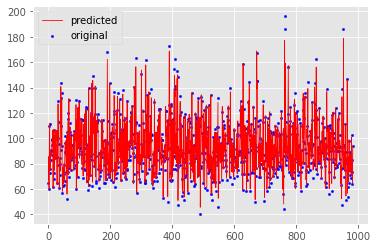

In [77]:
from sklearn.ensemble import GradientBoostingRegressor

# with new parameters
gbr = GradientBoostingRegressor(n_estimators=600, 
    max_depth=5, 
    learning_rate=0.01, 
    min_samples_split=3)
# with default parameters
gbr = GradientBoostingRegressor()

gbr.fit(x_train, y_train)

y_pred = gbr.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
print("MSE: %.2f" % mse)

x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [78]:
#Actual value and the predicted value
gbr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
gbr_diff.head(10)

,Actual value,Predicted value
491,64.511040,67.289061
91,85.502297,85.265821
947,60.027739,60.268384
1377,109.736925,105.016223
1143,111.325881,111.617122
1283,72.943179,74.402245
2808,76.122920,78.337812
2028,90.925553,89.602404
2796,83.057967,87.013247
2320,89.766697,87.703668


In [79]:
res = gbr.predict([[7, 100, 1, 0]])[0]
print("WQI: ", res)

WQI:  42.23202685615728


In [80]:
from sklearn.metrics import mean_squared_error, r2_score

gbr_pred_train = gbr.predict(x_train)
gbr_pred_test = gbr.predict(x_test)

print("Training RMSE: ", np.sqrt(mean_squared_error(y_train, gbr_pred_train)))
print("Training R2: ", r2_score(y_train, gbr_pred_train)*100)


print("Testing RMSE: ", np.sqrt(mean_squared_error(y_test, gbr_pred_test)))
print("Testing R2: ", r2_score(y_test, gbr_pred_test)*100)


Training RMSE:  1.5172405784997902
Training R2:  99.51786833220704
Testing RMSE:  2.4926756722101597
Testing R2:  98.67578252742948


### >> K Fold Cross Validation


In [81]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
model = GradientBoostingRegressor()
kfold_validation = KFold(10)
results = cross_val_score(model, x, y, cv = kfold_validation)
import numpy as np
from sklearn.model_selection import cross_val_score
results = cross_val_score(model, x, y, cv = kfold_validation)
print(results)
print("\nMean Accuracy Score: ", np.mean(results)*100)

[0.98881308 0.98689964 0.98137693 0.98915893 0.98938593 0.99035087
 0.98113327 0.98806178 0.98647511 0.986074  ]

Mean Accuracy Score:  98.6772952964045


### As seen above, Gradient Boosting Regressor gives accuracy of 98%



## <mark><em>8. Gradient Boosting Classifier or GBC</em></mark>

* Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model. Decision trees are usually used when doing gradient boosting. Gradient boosting models are becoming popular because of their effectiveness at classifying complex datasets, and have recently been used to win many Kaggle data science competitions.

In [82]:
#Setting the value for X and Y

x = dataset[['ph', 'TDS', 'Turbidity', 'Temperature']]
y = dataset.quality

# Splitting the dataset into training and testing set (80/20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 28, shuffle='true')

In [83]:
from sklearn.ensemble import GradientBoostingClassifier

#setting different learning rates, so that we can compare the performance of the classifier's performance at different learning rates.
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=42)
    gb_clf.fit(x_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(x_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(x_test, y_test)), "\n")

Learning rate:  0.05
Accuracy score (training): 0.730
Accuracy score (validation): 0.684 

Learning rate:  0.075
Accuracy score (training): 0.776
Accuracy score (validation): 0.720 

Learning rate:  0.1
Accuracy score (training): 0.795
Accuracy score (validation): 0.730 

Learning rate:  0.25
Accuracy score (training): 0.887
Accuracy score (validation): 0.834 

Learning rate:  0.5
Accuracy score (training): 0.923
Accuracy score (validation): 0.855 

Learning rate:  0.75
Accuracy score (training): 0.942
Accuracy score (validation): 0.874 

Learning rate:  1
Accuracy score (training): 0.973
Accuracy score (validation): 0.886 



#### learning rate of 0.75 gives us the best performance on the validation set and good performance on the training set.


In [84]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=42)
gb_clf2.fit(x_train, y_train)
y_pred = gb_clf2.predict(x_test)

In [85]:
gb_clf2.predict([[7, 75, 1, 20]])


array(['Poor'], dtype=object)

In [86]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred) * 100)


Accuracy: 85.45269582909461


### >> Stratified K-fold Cross Validation
* Used for unbalanced data and only used for discrete data
svm.

In [87]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

skfold = StratifiedKFold(n_splits = 10)
model = GradientBoostingClassifier()
score = cross_val_score(model, x, y, cv = skfold)
print(score)
print("\nMean Accuracy score: ", np.mean(score)*100)

[0.91158537 0.90853659 0.89939024 0.90243902 0.92378049 0.92682927
 0.92966361 0.91437309 0.91743119 0.9235474 ]

Mean Accuracy score:  91.57576266129635


### As seen above, Gradient Boosting Classifier gives accuracy of 91%



## <mark><em>9. Decision Tree Regression</em></mark>

* Decision tree regression observes features of an object and trains a model in the structure of a tree to predict data in the future to produce meaningful continuous output. 
* Continuous output means that the output/result is not discrete, i.e., it is not represented just by a discrete, known set of numbers or values.

In [88]:
#Setting the value for X and Y
x = dataset[['ph', 'TDS', 'Turbidity', 'Temperature']]
y = dataset.wqi


# Splitting the dataset into training and testing set (80/20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42, shuffle='true')

In [89]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(x_train, y_train)


y_pred = regressor.predict(x_test)
  

In [90]:
#Actual value and the predicted value
dt_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
dt_diff.head(10)

,Actual value,Predicted value
2947,92.309731,92.312659
2782,98.193551,99.181578
1644,78.588540,70.919656
70,67.631606,68.887435
2045,84.517055,85.760870
263,186.416743,183.784583
1042,103.589984,97.747927
2263,181.469417,183.784583
450,62.635550,63.474685
1832,99.499222,103.643294


In [91]:
res = regressor.predict([[7, 100, 1, 0]])[0]

print("WQI: ", res)

WQI:  44.787571212194926


In [92]:
from sklearn.metrics import mean_squared_error, r2_score

regressor_pred_train = regressor.predict(x_train)
regressor_pred_test = regressor.predict(x_test)

print("Training RMSE: ", np.sqrt(mean_squared_error(y_train, regressor_pred_train)))
print("Training R2: ", r2_score(y_train, regressor_pred_train)*100)


print("Testing RMSE: ", np.sqrt(mean_squared_error(y_test, regressor_pred_test)))
print("Testing R2: ", r2_score(y_test, regressor_pred_test)*100)


Training RMSE:  0.0
Training R2:  100.0
Testing RMSE:  5.16459382180424
Testing R2:  94.22977797565576


### >> K Fold Cross Validation

In [93]:

from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

model = DecisionTreeRegressor()
kfold_validation = KFold(10)
results = cross_val_score(model, x, y, cv = kfold_validation)
print(results)
print("\nMean Accuracy score: ", np.mean(score)*100)

[0.94810689 0.9422445  0.91831044 0.94299791 0.93646442 0.95561691
 0.95827731 0.94423223 0.91992017 0.95060758]

Mean Accuracy score:  91.57576266129635


## <mark><em>10. Decision Tree Classifier</em></mark>



### >> Stratified K-fold Cross Validation

In [94]:
# Used for unbalanced data and only used for discrete data

from sklearn.model_selection import StratifiedKFold

#Setting the value for X and Y
x = dataset[['ph', 'TDS', 'Turbidity', 'Temperature']]
y = dataset.quality

skfold = StratifiedKFold(n_splits = 5)
model = DecisionTreeClassifier()
score = cross_val_score(model, x, y, cv = skfold)
print(score)

print("\nMean Accuracy score: ", np.mean(score)*100)

[0.88262195 0.8610687  0.86259542 0.89160305 0.87022901]

Mean Accuracy score:  87.36236268851239


### >> Leave one out Cross Validation

In [95]:
#Not recommended

from sklearn.model_selection import LeaveOneOut
model = DecisionTreeClassifier()
leave_validation = LeaveOneOut()
results = cross_val_score(model, x, y, cv = leave_validation)
print(results)
print("\nMean Accuracy score: ", np.mean(results)*100)

[1. 1. 1. ... 1. 1. 0.]

Mean Accuracy score:  88.58363858363857


### >> Repeated Random Test-Train Splits
* This technique is a hybrid of traditional train-test splitting and the k-fold cross-validation method. In this technique, we create random splits of the data in the training-test split manner and then repeat the process of splitting and evaluating the algorithm multiple times, just like the cross-validation method.

In [96]:
from sklearn.model_selection import ShuffleSplit
model = DecisionTreeClassifier()
ssplit = ShuffleSplit(n_splits = 10, test_size = 0.3)
results = cross_val_score(model, x, y, cv = ssplit)
print(results)
print("\nMean Accuracy score: ", np.mean(results)*100)

[0.87385554 0.87995931 0.88402848 0.85045778 0.88606307 0.86978637
 0.8819939  0.87894201 0.87182096 0.88708037]

Mean Accuracy score:  87.63987792472024


## <mark><em>11. Artificial Neural Network (ANN) </em></mark>



In [117]:

import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import seaborn as sns
from matplotlib import pyplot as plt

In [118]:
#Setting the value for X and Y
x = dataset[['ph', 'TDS', 'Turbidity', 'Temperature']]
y = dataset.wqi

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 20)


In [119]:
#Scale data, otherwise model will fail.
#Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [135]:
# define the model
#Experiment with deeper and wider networks
model = Sequential()
model.add(Dense(128, input_dim=4, activation='relu'))
model.add(Dense(64, activation='relu'))
#Output layer
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.summary()
     

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 128)               640       
                                                                 
 dense_28 (Dense)            (None, 64)                8256      
                                                                 
 dense_29 (Dense)            (None, 1)                 65        
                                                                 
Total params: 8,961
Trainable params: 8,961
Non-trainable params: 0
_________________________________________________________________


In [136]:
history = model.fit(X_train_scaled, y_train, epochs = 15, validation_data=(X_test_scaled, y_test))

Epoch 1/15
82/82 [==============================] - 2s 7ms/step - loss: 8290.1689 - mae: 88.4134 - val_loss: 6046.9248 - val_mae: 75.3282
Epoch 2/15
82/82 [==============================] - 0s 5ms/step - loss: 2517.8213 - mae: 43.4142 - val_loss: 399.5785 - val_mae: 16.7403
Epoch 3/15
82/82 [==============================] - 0s 5ms/step - loss: 305.2941 - mae: 14.1076 - val_loss: 235.2941 - val_mae: 12.5378
Epoch 4/15
82/82 [==============================] - 0s 4ms/step - loss: 203.7732 - mae: 11.4499 - val_loss: 162.1807 - val_mae: 10.3914
Epoch 5/15
82/82 [==============================] - 0s 4ms/step - loss: 142.3826 - mae: 9.5025 - val_loss: 116.6228 - val_mae: 8.8046
Epoch 6/15
82/82 [==============================] - 0s 5ms/step - loss: 102.9005 - mae: 8.0115 - val_loss: 85.4813 - val_mae: 7.5421
Epoch 7/15
82/82 [==============================] - 0s 4ms/step - loss: 76.0602 - mae: 6.7842 - val_loss: 62.0330 - val_mae: 6.3404
Epoch 8/15
82/82 [==============================] - 0s

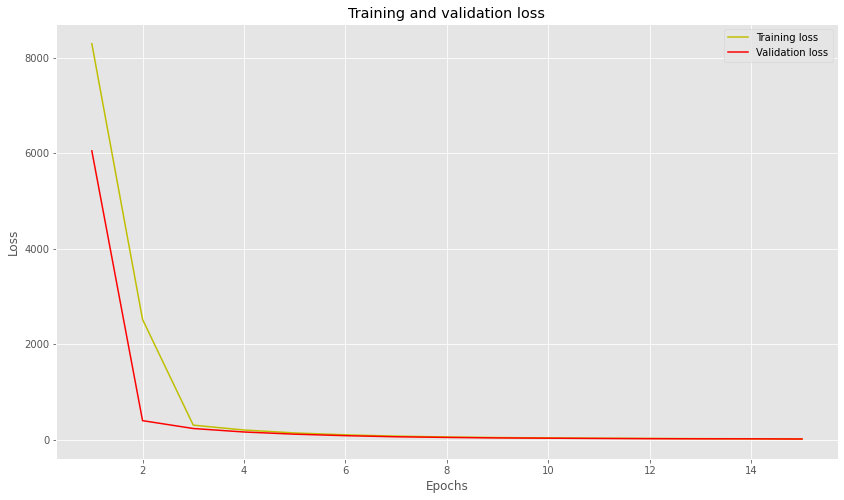

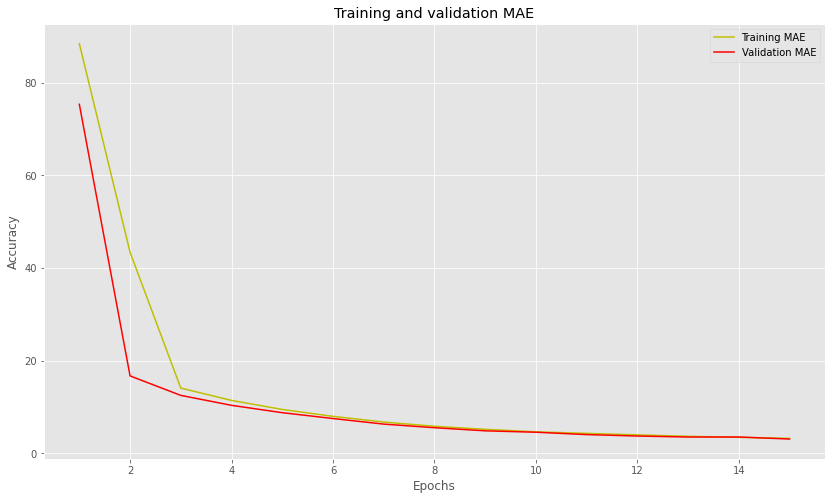

In [137]:
from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch

mpl.style.use("ggplot")
fig = plt.figure(figsize = (14, 8))

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


mpl.style.use("ggplot")
fig = plt.figure(figsize = (14, 8))

acc = history.history['mae']
val_acc = history.history['val_mae']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#Curve diagnoses: https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/
#DL: https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/

* Above Learning curves shows a <b>Good Fit Learning Curves</b>, 
* A good fit is the goal of the learning algorithm and exists between an overfit and underfit model.
* A good fit is identified by a training and validation loss that decreases to a point of stability with a minimal gap between the two final loss values.
* The loss of the model will almost always be lower on the training dataset than the validation dataset. This means that we should expect some gap between the train and validation loss learning curves. This gap is referred to as the “generalization gap.”

> 1. A plot of learning curves shows a good fit if:
>> 1.1 The plot of training loss decreases to a point of stability. <br>
>> 1.2 The plot of validation loss decreases to a point of stability and has a small gap with the training loss.

In [138]:
#Predict on test data
predictions = model.predict(X_test_scaled[:5])
print("Predicted values are: ", predictions)
print("\nReal values are: ", y_test[:5])
     

1/1 [==============================] - 0s 76ms/step
Predicted values are:  [[ 74.71016]
 [ 69.21465]
 [ 88.90925]
 [ 62.26998]
 [110.33412]]

Real values are:  2378     76.601822
1444     65.306363
303      88.194546
2113     57.341511
2537    111.113618
Name: wqi, dtype: float64


In [142]:
res = model.predict([[7.080795, 20791.31898, 2.963135, 29.3]])[0]
print("WQI: ", res)

1/1 [==============================] - 0s 63ms/step
WQI:  [389298.16]


In [141]:
#Comparison with other models..
#Neural network - from the current code
mse_neural, mae_neural = model.evaluate(X_test_scaled, y_test)
print('Mean squared error from neural net: ', mse_neural)
print('Mean absolute error from neural net: ', mae_neural)

21/21 [==============================] - 0s 4ms/step - loss: 14.9512 - mae: 3.1200
Mean squared error from neural net:  14.951192855834961
Mean absolute error from neural net:  3.1200082302093506
